In [1]:
file = open("custom.css") # A .css file in the same folder as this notebook file
styl = readstring(file) # Read the file
HTML("$styl") # Output as HTML

HTML{String}("<style>\n/*\n  Dark theme for Jupyter Notebook/iPython 4\n  Author: Theodore Pak\n  Repo at: https://github.com/powerpak/jupyter-dark-theme\n\n  Inspired by and adapted from the following:\n  Base16 for iPython Notebook (https://github.com/nsonnad/base16-ipython-notebook)\n  Base16 Twilight Dark, David Hart (http://hart-dev.com)\n  CodeMirror template adapted for IPython Notebook by Nikhil Sonnad (https://github.com/nsonnad/base16-ipython-notebook)\n  CodeMirror template by Jan T. Scott (https://github.com/idleberg/base16-chrome-devtools)\n  Original Base16 color scheme by Chris Kempson (https://github.com/chriskempson/base16)\n*/\n\n/* Suuposed to fix Chrome issue with math equations */\n.MathJax nobr>span.math>span{border-left-width:0 !important};\n\n\nbody, body.notebook_app.command_mode {\n  font-family: -apple-system, BlinkMacSystemFont, \"Segoe UI\", \"Helvetica Neue\", Helvetica, Arial, sans-serif;\n}\n\n/*\n  SET THE CODE/MONOSPACE FONT\n\n  I prefer Bitsream Vera Sans Mono, which is freely downloadable here:\n  http://www.dafont.com/bitstream-vera-mono.font\n  However, there are plenty of alternatives at http://programmingfonts.org/\n  in which case, add your preferred font to the stack below.\n*/\n\n.CodeMirror pre, .CodeMirror-dialog, .CodeMirror-dialog .CodeMirror-search-field, .terminal-app .terminal {\n    font-family: \"Consolas\", \"Bitstream Vera Sans Mono\", Monaco, monospace;\n    font-size: 10pt;\n}\n.terminal-app .terminal { line-height: 1.3em; }\ndiv.output pre, div.output code, .rendered_html pre, .rendered_html code, div.completions select, div.container pre {\n  font-family: \"Consolas\", \"Bitstream Vera Sans Mono\", Monaco, monospace;\n}\ndiv.output pre, div.output code, .rendered_html pre, .rendered_html p code, div.completions select, div.container pre {\n    font-size: 11pt;\n}\n\n/* .rendered_html p {\n    font-size: 12pt;\n} */\n\ndiv.prompt, div.tooltiptext pre {\n    font-family: \"Consolas\", \"Bitstream Vera Sans Mono\", Monaco, monospace;\n    font-size: 9pt;\n}\n\ndiv.input_area {\n    border-color: rgba(0, 0, 0, 0.10);\n    background: rbga(0, 0, 0, 0.5);\n}\n\n/* GLOBALS */\n\n@media not print { body { background-color: #eee; } }\na { color: #CF4A4C; }\na:hover, a:focus { color: #DE6F71; }\n\n/* INTRO PAGE */\n\nbody[data-notebook-path] { background-color: #222; }\nbody[data-notebook-path] #header, .terminal-app #header { display: none !important; }\n\n.tabbable { color: #979797; }\n.nav-tabs { border-bottom-color: #444; }\n.nav-tabs > li > a:hover, .nav > li > a:focus {\n  background-color: #333;\n  border-color: #222 #222 #555 #222;\n}\n.nav-tabs > li.active > a, .nav-tabs > li.active > a:focus, .nav-tabs > li.active > a:hover {\n  color: #979797;\n  background-color: #444;\n  border-top-color: #444;\n  border-right-color: #444;\n  border-left-color: #444;\n}\n.list_container { border-color: #444; }\n.list_container > div { border-bottom-color: #444; }\n.list_item:hover { background-color: #333; }\n.list_header { background-color: #444; }\n#notebook_list input[type=\"checkbox\"] { opacity: 0.3; }\n#notebook_list input[type=\"checkbox\"]:checked { opacity: 1; }\n.item_icon { color: #777; }\n.panel { border-color: #444; background-color: #222; }\n.panel-default > .panel-heading { border-color: #444; }\n#site .panel-group .panel .panel-heading { background-color: #444; }\n#running .panel-group .panel .panel-body .list_container .list_item { border-bottom-color: #444; }\n\n/* Dropdown menus */\n\n.dropdown-menu {\n  background: rgba(50, 50, 50, 0.95);\n  color: #b7b7b7;\n}\n.dropdown-menu > li > a, .dropdown-submenu > a:after, .dropdown-menu > li > a:visited:after {\n  color: #b7b7b7;\n}\n.dropdown-menu .divider {\n  background-color: #444;\n}\n.dropdown-menu > li > a:hover, .dropdown-menu > li > a:focus {\n  color: #fff;\n  background-color: #444;\n}\n.dropdown-menu > li > a:hover:after, .dropdown-menu > li > a:focus:after,\n.dropdown-menu > li > a:active:after {\n  color: #

In [ ]:
using SymPy
using Plots
using LaTeXStrings
using LatexPrint

In [13]:
using DifferentialEquations

INFO: Recompiling stale cache file C:\Users\alexe\.julia\lib\v0.6\DifferentialEquations.ji for module DifferentialEquations.


In [ ]:
theme(:dark)
pyplot(size=(300,200), frame=true)

# Understanding partial differential equations: physics, maths and numerical methods

Partial differential equations(PDE) course (or sometimes called "Equations of mathematical physics") is a tough one. If you have an experience in *ordinary differential equations* (ODE) and think that it is just some extension, you are up for a big surprise. I myself got caught in this during my undegrad. On the top of this, the subject is often taught in a rather abstract way. If you've just done a PDE course, how would you answer "*What have I learnt*?"

I found my personal key to undetstand PDEs through years of practice by solving engineering problems involving them. There are three steps in the process. First, physical formulation. As a mathematician, initially I used to overlook this part. However, a simple physical consideration can povide clues for solving the problem. Second, mathematical formulation. Here one can go straight to one of the well-known conservation equations. The nature of engineering problems, however, is such that one must be very careful in choosing the appropriate equation. I never cared to memorise all of them for different cases. Instead, I can just derive them: the technique is simple and results in a correct equation in each case. Third, find the solution. As engineering problems most of the times are non-linear, finding the solution means developing a suitable numerical scheme. Let's look at each stage and see what we can learn from each of them, using a simple example of a heat transfer.

## Physical problem

Consider the following physical system. A liquid flows in a channel from left ($x=0$) to right ($x=1$) with some known velocity $v$, but in genreal it may not be a constant, i.e. $v=v(t,x)$. Let's consider two cases:
1. Liquid "particles" are not allowed to mix;
2. Liquid "particles" mix and can exchange the energy.

The former provides a pure convective transport. Let's imaging initial state where the temperature in the channel is zero (in some suitable units) and at $x=0$ we pump hotter liquid at temperature one. If $v=\mathrm{const}$ we expect the hot front (mathematically, it would be a discontinuity front) to move from left to the right as time goes forward. Essentially, each space point will become instanteneosly hot once the hot liquid reaches it. The case with mixing, however, provides a different image: here the temperature will disperse through the liquid, warming up neighbouring regions and cooling itself in exchange. If the dispersion is fast enough, there will be no visible front. Instead, points somewhat removed from $x=0$ will gradually increase their temperature via dispersion until moving hot liquid reaches it. This physical description of the process already sets us up on the path of formulating the problem mathematically and finding its solution. Next step is to derive the conservation principle.  

## Conservation principle

Let $u(t,x)$ denote the temperature at time $t$ and point $x$ of *space*. This is Eulerian view of the problem. Lagrangian view would be to study temperature $u^*(t,\xi)$ at time $t$ of a liquid "particle" $\xi$. Two views can be connected if, for example, $\xi$ is a position of a "particle" at time $t=0$. Then
$$
u(t,x) = u^*\left(t, (x^*)^{-1}(t, x)\right)
$$
where $x=x^*(t,\xi)$ is a trajectory of a particle. Let's stop for a second and ponder. *What does the above equation mean?* In words, it says that *the temperature at time $t$ at point $x$ of space is the temperature of a liquid that happens to be at that point; we find the liquid "particle" $\xi$ by tracing back its trajectory*. Lagrangian view is useful in derivation of the conservation equations. However, Eulerian view is more useful from practical perspective. In Eulerian view, we are concerned with a place in space and let the liquid pass through it. Since we cannot describe the conservation at a point in an easy way, we will look at some volume $V$. The conservation principle for the volume $V$ becomes

> Change in internal energy = What comes in $-$ what comes out $\pm$ sources and sinks

Sources and sinks are present only because the system is not closed and there is some external interraction. For example, a portion of a channel might be heated up externally. Or there might be a chemical reaction occurring in the liquid that produces or consumes the heat. (this conservation principle can stated not only for energy, but also for mass, momentum, angular momentum and entropy; entropy presents an interesting case since for entropy there will be a source term for a closed system, but this is another story...) Mathematically the conservation principle is expressed as follows:
$$
\frac{\partial}{\partial t}\int_V c u\,dV = -\int_{\partial V}J\cdot\nu\,dS + \int_V r\,dV,
$$
where $c$ is heat capacity and is assumed $c=1$ for simplicity, $J$ is heat flux through the volume surface $\partial V$, $\nu$ is outer normal to $\partial V$, $a\cdot b$ denotes dot-product and $r$ is the source term which we will assume to be zero. With stated simplifications, above equation becomes:
$$
\frac{\partial}{\partial t}\int_V u\,dV = -\int_{\partial V}J\cdot\nu\,dS
$$
Now, we will use divergence theorem to transform the integral on the RHS to the volume integral:
$$
\frac{\partial}{\partial t}\int_V u\,dV = -\int_{V}\nabla\cdot J\,dV.
$$
Here the dot-product notation was used to avoid the confusion between divergence and gradient operators. Since volume $V$ does not change in time, the time derivative can be brought under the integration:
$$
\int_V \left( \frac{\partial u}{\partial t} +\nabla\cdot J\right)\,dV = 0.
$$
Finally, as this equation must be true for every volume $V$, the expression under the integral must be zero:
$$
\frac{\partial u}{\partial t} +\nabla\cdot J=0.
$$
We have successfully derived a differential form of the conservation equation, often also called *continuity equation*. The last step that is left is to specify the the form of the flux $J$. In the first case of no mixing, $J$ is pure convection:
$$
J_1 = u v.
$$
If the mixing is allowed, heat conduction flux, known as Fourier's law, is added:
$$
J_2 = u v - k\nabla u.
$$
Here $\nabla u$ is a gradient of a scalar $u$. It must be stated that unlike convection, Fourier's law and similar Fick's law for diffusion and Newton's law for momentum are not fundamental, but rather experimentally derived approximations of the physical reality. We can see that pure convection is actually a special case of more general second flux when $k=0$. Using more general form, the continuity equation becomes
$$
\frac{\partial u}{\partial t} +\nabla\cdot (uv) - \nabla\cdot(k\nabla u) = 0.
$$
In 1D-case with $v$ and $k$ being constants it becomes
$$
\frac{\partial u}{\partial t} +v\frac{\partial u}{\partial x} - k\frac{\partial^2 u}{\partial x^2} = 0.
$$

## Solution of convection equation

Let's assume for a moment $k=0$ but, to keep things interesting, let's make velocity non-constant $v=v(x)\geq0$:
$$
\frac{\partial u}{\partial t} + \frac{\partial (v u)}{\partial x} = \frac{\partial u}{\partial t} + v(x)\frac{\partial u}{\partial x}+v'(x) u= 0.
$$
This is *the first order linear PDE with non-constant coefficients*. To simplify the discussion, let's assume that the channel is infinite, but we will be interested in just a segment of it. Then, the solution will only require initial condition $u(0,x)=u_0(x)$. Considering our original statement of a cold liquid in a channel and hot liquid rushing-in from $x=0$, initial condition can be stated as
$$
u_0(x)=1 - \theta(x),
$$
where $\theta(x)$ is a step function: it is zero for $x<0$ and 1 for $x\geq0$. *Wait a second! This function is not even continuous, never mind being differentiable!* We need to resolve this problem. Let's look at the physics. It won't be possible to achieve exact hot front physically as some heat dispersion will always exist. So, in reality we have not a step function, but some smooth and rapidly changing function. Nevertheless, step function is a good reality approximation and it is desirable to be able to work with it directly.


### Classical solution

Let's first examine a smooth case and assume
$$
u = 
\begin{cases}
1, x<-\delta\\
\frac{1}{2}-\frac{1}{2}\sin\left(\frac{\pi x}{2\delta}\right),-\delta\leq x < \delta\\
0, x \geq\delta
\end{cases}
$$
in which case $u_0(x)$ is continuous with its first derivative:

In [4]:
function u0(x)
    δ = 0.1
    if x < -δ
        1.0
    elseif x < δ
        1/2 - 1/2*sin(π*x/(2*δ))
    else
        0.0
    end
end

u0 (generic function with 1 method)

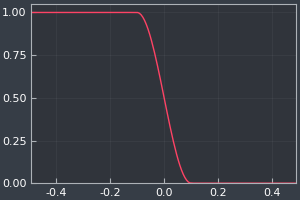

In [6]:
plot(u0, -0.5, 0.5, ylims=(0.0, 1.05), leg = :none)

In [11]:
@syms x
δ = Sym("delta")

du0 = diff(1/2-1/2*sin(PI*x / (2*δ)), x)
display(du0)

(du0(x=>-δ), du0(x => δ))

            /  pi*x \ 
-0.25*pi*cos|-------| 
            \2*delta/ 
----------------------
        delta         

(0, 0)

The solution of the PDE is found by re-writing it in the form
$$
\frac{\partial u}{\partial t} + v(x)\frac{\partial u}{\partial x} = -v'(x) u
$$
and noticing that in the extended space $\mathbb{R}^2_{x,t}$ the left-hand-side of the equation is the dot-product of the extended velocity vector $V=\{1,v(x)\}$ and extended gradient of $u$: $\{\partial_t u,\partial_x u\}$. If $x^*(t,\xi)$ are the trajectories of liquid "particles", then the equation means that *the rate of change of temperature $u$ along the trajectory is $-v'(x)u$*. This is the basis of the method of characteristics consisting of two equations. The first equation defines trajectories (or characteristics):
$$
\dot x^* = \frac{\partial x^*(t,\xi)}{\partial t} = v(x)
$$
and the second equation defines the change of temperature on the trajectory, i.e. the temperature of the liquid "particle":
$$
\dot u^* = -v'(x)u^*.
$$
The solution of the first equation obtained by solving the algebraic equation
$$
\int_\xi^x \frac{dy}{v(y)} = t
$$
for $x^*$. However, as it will be seen, what we really need is not the trajectory itself, but its inverse: $\xi=\xi(t,x)$, i.e. we need to find initial position of the particle that happens to be in $x$ at time $t$.

> Before moving on and solving the second equation, let's stop for a second. *Why would the temperature change?* The PDE was a result of energy balance. Notice, the change of the temperature of the single "particle" will only happen if the velocity field $v(x)$ is non-constant. Furthermore, temperature should *increase* when the velocity *decreases*. What we seem to see here is transition of energy from internal to kinetic and back!

Now, to the solution. If the trajectory is known, the above equation becomes
$$
\dot u^* = -f(t,\xi)u^*
$$
where $f(t,\xi) = v'\circ x^*(t,\xi)$, i.e. value of $v'(x)$ is taken on the trajectory. Solution of this equation is
$$
\int_{u_0}^{u^*} \frac{dU}{U} = -\int_0^t f(t,\xi)dt
$$
Since $f(t,\xi)$ has quite a special form, we may hope to move further in integration.

Let's differentiate $v^*(t,\xi)=v\left(x^*(t,\xi)\right)$ with respect to $t$:
$$
\frac{\partial}{\partial t}v\left(x^*(t,\xi)\right) = \left.v'(x)\right|_{x=x^*(t,\xi)}v^*(t,\xi)=f(t,\xi)v^*(t,\xi)
$$
Thus, the avove integration can be re-written as follows:
$$
\log\frac{u^*}{u_0} = -\int_0^t \frac{\dot v^*}{v^*(t,\xi)} dt = -\int_{v^*(0,\xi)}^{v^*(t,\xi)}\frac{dv^*}{v^*}=
\log\frac{v(\xi)}{v^*(t,\xi)}.
$$
Still in Lagrangian coordinates this simplifies to
$$
u^*(t,\xi) = u_0(\xi)\frac{v(\xi)}{v\left(x^*(t,\xi)\right)}
$$
Let's use the inverse of the trajectories to get the solution in the Eulerian view
$$
u(t,x) = u_0(\xi)\frac{v(\xi)}{v(x)},\quad\text{where }\xi = \left(x^*\right)^{-1}(t,x).
$$

>A sceptical reader at this point should have an itch as we have ignored a few corner cases. Most importantly, what if the trajectory is not invertable? I.e. if we cannot restore initial position from the point $(t,x)$. For example, consider the field $v(x)=e^{-x}$. Then particles from smaller $x$ position will catch up with slower moving particles in larger $x$ positions. At some point in time $T$ in place $x$ there will be particles from multiple initial positions $\xi$. This kind of time $T$ gives us an upper time boundary for a classical solution. Another problem is if velocity field becomes zero. We side-step the issue by assuming that $v(x)>0$. Finally, it is left to a reader to check that $u_0=0$ does not present an issue for the final solution.

**The final note on the solution before moving on**: since for the Eulerian view solution $u(t,x)$ we need to find initial positions $\xi$ of particles at $(t,x)$, it makes sense to solve the trajectory equation back in time: find $y$ at time $t$, such that
$$
\dot y = -v(y),\quad y(0) = x.
$$
With this equation we are moving backward along the trajectory from $x$ to the initial position $\xi=y(t)$.

Finally, the solution procedure looks as follows. If want to find the solution of
$$
\partial_t u + \partial_x\left(v(x)u\right) = 0,\quad u(0,x)=u_0(x)
$$
for $t\in[0,T]$ and $x\in[a,b]$, perform the following:

1. Partition $0=t_0<t_1<\dots<t_m=T$ and  $a=x_0<x_1<x_2<\dots<x_n=b$. This is only necessary if the following step cannot be completed analytically.
2. Solve $\dot y = -v(y)$ with $y(0)=x$ for $y(t)$. If it cannot be solved analytically, solve numerically for each time $t_i$ and each initial value $x_j$ getting initial positions $\xi_{i,j}$.
3. Calculate
   $$
   u(t,x) = u_0(\xi)\frac{v(\xi)}{v(x)}
   $$
   or on $(t_i, x_j)$ and corresponding $\xi_{i,j}$.

The following code implements this procedure. It uses Tsitouras 5/4 Runge-Kutta method of `DifferentialEquations.jl` package to numerically solve the differential equation.

In [14]:
function solveConvection(u0, v, tmax, a, b, M, N)
    # Partitions:
    tpts = zeros(M+1)
    xpts = zeros(N+1)
    map!(i -> tmax/M*i, tpts, 0:M)
    map!(j -> a + (b-a)/N*j, xpts, 0:N)
    # Velocity field: it is constant in time, can
    # calculate it once
    vx = v.(xpts)
    # Storage for initial positions
    # Take advantage of column-major matrix
    ξ = zeros(N+1, M+1)
    # Solutions
    u = zeros(N+1, M+1)
    # Initial condition
    u[:, 1] .= u0.(xpts)
    # Initial positions:
    ξ[:, 1] = xpts[:]
    # Differential equation RHS in a vector form:
    function vODE(dy, y, p, t)
        dy[:] .= -v.(y)
    end
    # For every time point
    for i in 1:M
        # xpts might be mingled by ODE solver: restore from a copy
        xpts[:] = ξ[:,1]
        let tspan = (0.0, tpts[i+1]),
            prob = ODEProblem(vODE, xpts, tspan),
            sol  = DifferentialEquations.solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
            # Store initial points
            ξ[:, i+1] = sol(tpts[i+1])
            # Calculate the temperature
            u[:, i+1] .= u0.(ξ[:,i+1]) .* v.(ξ[:,i+1]) ./ vx
        end
    end
    return (u, ξ[:,1], tpts)    
end

solveConvection (generic function with 1 method)

Let's use this procedure to solve for the field $v(x)=e^x$ for which trajectories are unique:

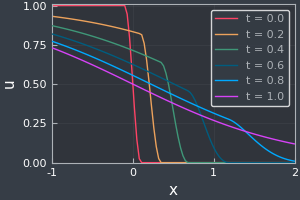

In [16]:
usol, xpts, tpts = solveConvection(u0, x -> exp(x), 1.0, -1.0, 2.0, 100, 100);

plot(xlabel = "x", ylabel="u", ylims=(0.0,1.01))
for j=1:20:101
    plot!(xpts, usol[:, j],lab = "t = $(tpts[j])")
end
plot!()

This can be compared with the exact solution
$$
u(t,x) = u_0\left(\log\frac{1}{e^{-x}+t}\right)\left(1-\frac{t}{e^{-x}+t}\right)
$$

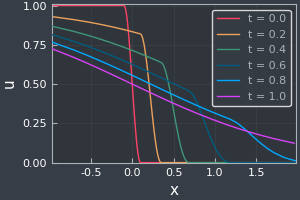

In [17]:
plot(xlabel = "x", ylabel="u",ylims=(0.0,1.01))
for t in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    plot!(x -> u0(-log(exp(-x)+t))*(1 - t / (exp(-x)+t)), -1.0, 2.0, lab = "t = $t")
end
plot!()

Let's examine the solution qualitatively. Initial hot front is moving to the right since velocity field $v(x)>0$. Furthermore, it is spreading as particles with larger $x$ move faster compared to particles with smaller $x$.

And let's see what happens for the field $v(x)=e^{-x}$. Here the fast moving particles are catching up with slower ones. Furthermore, they slow down as they arrive to larger $x$, releasing internal energy. Some trajectories eventually will collide. Thus, we expect the solution to break down at some point.

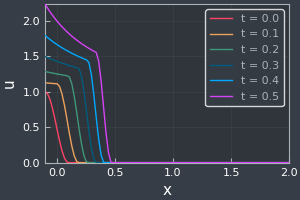

In [18]:
usol, xpts, tpts = solveConvection(u0, x -> exp(-x), 0.5, -0.1, 2.0, 100, 100);

plot(xlabel = "x", ylabel="u")
for j=1:20:101
    plot!(xpts, usol[:, j],lab = "t = $(tpts[j])")
end
plot!()

Notice how the temperature grows unbounded for small $x$. Furthermore, initial smooth step becomes steeper. The time upper boundary had to be restricted as the numerical solver starts failing. Exact solution in this case is
$$
u(t,x) = u_0\left(\log\left(e^x-t\right)\right)\left(1+\frac{t}{e^x-t}\right)
$$
and it has a singularity when $t=e^x$. The smallest $x$ considered was $x=-0.1$. Thus, the lagest $t$ before singularity is

In [19]:
exp(-0.1)

0.9048374180359595

While there is an advantage in using the filed $v(x)=e^{-x}$ to get an analytical solution, this field is rather unphysical as the velocity grows too fast as $x$ decreases. Let's restrict the velocity field and make it step-wise linear:
$$
v(x) = 
\begin{cases}
1.0, x < -\delta\\
1-\frac{0.9}{2\delta}(x+\delta), -\delta \le x < \delta\\
0.1, x \geq\delta
\end{cases}
$$

In [22]:
function vlin(x)
    δ = 0.1
    if x <= -δ
        1.0
    elseif x>= δ
        0.5
    else
        1.0 - 0.5/(2δ)*(x+δ)
    end
end

vlin (generic function with 1 method)

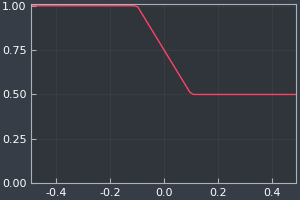

In [24]:
plot(vlin, -0.5,0.5, ylim=(0.0, 1.01),leg=:none)

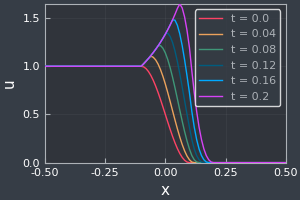

In [21]:
usol, xpts, tpts = solveConvection(u0, vlin, 0.2, -0.5, 0.5, 100, 100);

plot(xlabel = "x", ylabel="u")
for j=1:20:101
    plot!(xpts, usol[:, j],lab = "t = $(tpts[j])")
end
plot!()

Interestingly, we even can find the solution for discontinuous $v(x)$. It would result in discontinuous $u(t,x)$, but let's park this issue for a moment (in fact, the previous example already had a discontinuity in $\partial_x u$). For example, if
$$
v(x) = 
\begin{cases}
0.5, x < -\delta\\
1-\frac{0.9}{2\delta}(x+\delta), -\delta \le x < \delta\\
0.5, x \geq\delta
\end{cases}
$$
i.e. there is a narrow piece of fast moving liquid. Let's look at the result.

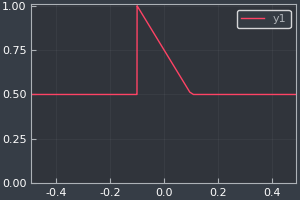

In [29]:
function vlin2(x)
    δ = 0.1
    if x <= -δ
        0.5
    elseif x>= δ
        0.5
    else
        1.0 - 0.5/(2δ)*(x+δ)
    end
end
plot(vlin2, -0.5, 0.5, ylims=(0.0,1.01))

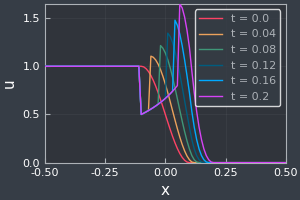

In [30]:
usol, xpts, tpts = solveConvection(u0, vlin2, 0.2, -0.5, 0.5, 100, 100);

plot(xlabel = "x", ylabel="u")
for j=1:20:101
    plot!(xpts, usol[:, j],lab = "t = $(tpts[j])")
end
plot!()

Solution develops a discontinuity just behind the fast moving piece of liquid. Essentially, the liquid creates a "vacuum" as some particles run away from there while others (with smaller $x$) didn't quite get there yet. This results in discontinuous dip in the temperature. This a plausible physical effect. Our model, however, cannot capture it as $u(t,x)$ is required to be continuously differentiable. The resolution of this problem is to generalize the derivative such that it would allow discontinuities.

## Generalized solution of the convection equation

Since equation
$$
u_t + (v(x)u)_x=0
$$
must be always valid, multiplying it by some "nice" function $\phi(t, x)$ that is non-zero only inside some $G$ that is a subset of the solution domain $\Pi = \{-\infty<x<\infty, 0\leq t \leq T\}$ and integrating over the domain $\Pi$ won't change the validity of the equation:
$$
\int_\Omega (u_t\phi +(v(x)u)_x\phi)\,dtdx=0
$$
Since $\phi=0$ outside of $G$, the above equation simplifies to
$$
\int_G (u_t\phi +(v(x)u)_x\phi)\,dtdx=0
$$
The next step is to use integration by parts (or more generally, to use divergence theorem). We will require $\phi|_{\partial G}=0$. Thus, the integral over the surface of $G$ disappears and the result of integration by parts is
$$
\int_G(u\phi_t+v(x)u\phi_x)\,dtdx=0
$$
Notice, that $u(t,x)$ in this equation does not have to be differentiable or even continuous. If $\phi\in C^\infty(\Pi)$, all it is required that $u(t,x)\in L_2(G)$ and $v(x)\in L_2(G_x)$, where $G_x$ is $x$ the projection of $G$ onto $x$.

Now the field $v(x)$ can be discontinuous. Initial condition $u_0(x)$ can be discontinuous as well. Thus, we can start looking at problems of discontinuity propogation. But before diving into this, let's revise what happens with the continuous problem that reaches discontinuity.

There is one problem with all the previous examples of discontinuity formation: temperature $u(t,x)$ builds up as energy density increases without bounds. Unfortunately, this results in $u(t,x)\not\in L_2(G)$. This was the result of requiring the velocity field depend on $x$ and, thus, requiring infinite supply of energy to accelerate the liquid in some parts. Let's assume a slightly different scenario. Let $v$ be a natural convection (assuming $x$ directed upwards). For simplicity, let's assume $v\propto u$. Choosing spatial and time units and units of $u$, the relation can be transformed into $v=(1/2)u$. Thus, the equation becomes
$$
u_t+\left(\frac{1}{2}u^2\right)_x=0.
$$
This is Hopf's equation. In contrast to previous examples, Hopf's equation is pseudo-linear: velocity field $v$ now also depenends on $u$, but not on $u_x$. Let's write characteristic equations:
$$
\dot x = u,\quad x(0)=\xi
$$
$$
\dot u = 0,\quad u(0,x)=u_0(x)
$$
The second equation in Lagrangian view can be solved immediately
$$
u^*(t,\xi) = u_0(\xi)
$$
I.e. there is no increase in temperature along particle trajectories. With this information, the first equation is also trivially solved:
$$
x^*(t,\xi) = \xi + u_0(\xi)t
$$
To get Eulerian solution $u(t,x)$, the trajectories need to be inversed to get $\xi$. once again we are running into the problem if they are not invertable. For example, if there is hotter liquid behind cold one as the hot part will try to move faster.

Let's solve equation
$$
u_t+v(x)u_x+v'(x)u=0
$$
with
$$
v(x)=e^x
$$
and initial condition
$$
x(0) = \xi
$$
$$
u(0, x) = u_0(\xi) =
\begin{cases}
1, \xi<\delta;\\
\frac{1}{2}\left(1-\sin\left(\frac{\pi \xi}{2\delta}\right)\right), -\delta\leq x < \delta;\\
0, x\geq \delta.
\end{cases}
$$
Lagrangian view of the solution is
$$
x^*(t,\xi) = -\log\left(e^{-\xi}-t\right)
$$
$$
u^*(t,\xi) = u_0(\xi)\left(1-e^\xi t\right)
$$
In Eulerian coordinates this becomes
$$
\xi = \log\frac{1}{e^{-x}+t}
$$
$$
u(t,x) = u_0\left(\log\frac{1}{e^{-x}+t}\right)\left(1-\frac{t}{e^{-x}+t}\right).
$$

In [26]:
δ = 0.1

function u0(ξ)
    if ξ ≤ -δ
        1.0
    elseif ξ ≥ δ
        0.0
    else
        0.5*(1.0 - sin(π*ξ / (2δ)))
    end
end

function u(t, x)
    tmp = exp(-x)+t
    ξ = -log(tmp)
    return u0(ξ) * (1 - t / (tmp))
end

u (generic function with 1 method)

In [27]:
(θ -> u(θ, 0.1))(0.2)

0.8189732888951378

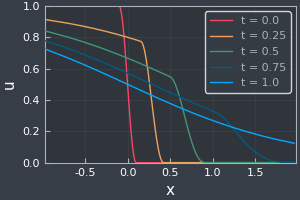

In [45]:
plot(xlabel = "x", ylabel="u")
for θ in [0.0, 0.25, 0.5, 0.75, 1.0]
    plot!(ξ->u(θ,ξ), -1.0, 2.0, lab = "t = $θ")
end
plot!()
# plot([ξ -> u(θ, ξ) for θ in [0.0, 0.25, 0.5, 0.75, 1.0]], -1.0, 2.0, lab=["1"; "2"; "3"; "4"; "5"])

In [46]:
function u1(t, x)
    tmp = exp(x)-t
    ξ = log(tmp)
    return u0(ξ) * (1 + t / (tmp))
end

u1 (generic function with 1 method)

In [63]:
u1(0.75, -0.1)

5.843790406178303

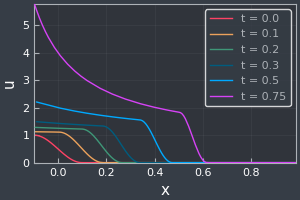

In [64]:
plot(xlabel = "x", ylabel="u")
for θ in [0.0, 0.1, 0.2, 0.3, 0.5, 0.75]
    plot!(ξ->u1(θ,ξ), -0.1, 1.0, lab = "t = $θ")
end
plot!()

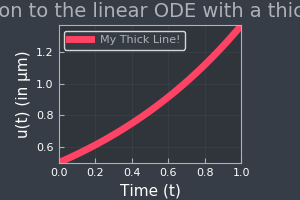

In [66]:
let f(u,p,t) = 1.01*u,
    u0=1/2,
    tspan = (0.0,1.0),
    prob = ODEProblem(f,u0,tspan),
    sol = DifferentialEquations.solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
    
    plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!")
end

### BISECTION
**Input:** $f:\mathbb{R}\to\mathbb{R}$, $a\in\mathbb{R}$, $b\in\mathbb{R}$, $\varepsilon\in\mathbb{R}_{+}$  
**Output:** $x\colon \exists \xi\in(x-\varepsilon,x+\varepsilon), f(\xi)=0$  
$f_a \gets f(a)$  
$f_b \gets f(b)$  
$\epsilon \gets 2\varepsilon$  
**while** $\vert a - b \vert \geq \epsilon$ **do**  
$\hphantom{mm}c\gets (a+b)/2$  
$\hphantom{mm} f_c\gets f(c)$  
$\hphantom{mm}$**if** $f_af_c\leq0$ **then**  
$\hphantom{mmmm} b\gets c, f_b \gets f_c$  
$\hphantom{mm}$**end if**  
$\hphantom{mm}$**if** $f_cf_b\leq0$ **then**  
$\hphantom{mmmm} a\gets c, f_a \gets f_c$  
$\hphantom{mm}$**end if**  
**end while**  
**return** $(a+b)/2$

In [ ]:
function bisection(f, a, b, eps)
    fa = f(a)
    fb = f(b)
    u = 2*eps
    n = 0
    while abs(a-b) >= u
        n += 1
        @printf "Step %3d:\t[%g, %g]\n" n a b
        c = (a+b) / 2
        fc = f(c)
        if fa*fc <= 0
            b, fb = c, fc
        end
        if fc*fb <= 0
            a, fa = c, fc
        end
    end
    return (a+b) / 2
end

In [ ]:
bisection(x -> x*x - 2.0, 1.0, 2.0, 1e-9)

In [ ]:
using Interact

In [ ]:
using Plots
theme(:dark)
pyplot(frame=true)

In [ ]:
@manipulate for x=1:10
        x^2
    end

In [ ]:
@manipulate for ω=0.1:0.1:4.0, φ=0.0:0.1:π, which=false
    if which
        plot(x-> sin(ω*x+φ), 0.0, 2π)
    else
        plot(x-> exp(-ω*x+φ), 0.0, 2π)
    end
end

In [7]:
display("text/markdown", "\$\$u_0=[1,2,3]\$\$")

$$u_0=[1,2,3]$$

Oops. This is too big.
$$
u_0=[1,2,3]
$$